<a href="https://colab.research.google.com/github/walter118725/Amigo-Secreto/blob/main/TelecomX_Parte2_Walter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Walter Malpartida Soto

## Extracción del Archivo Tratado

In [ ]:
# Librerías básicas
import pandas as pd

# Ruta del CSV generado en la Parte 1
# ⚠️ Cambiá 'datos_clientes_limpio.csv' por el nombre exacto de tu archivo exportado
df = pd.read_csv("datos_clientes_limpio.csv")

# Verificar estructura inicial
print(df.shape)
df.head()

(7043, 22)


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0002-ORFBO,0,female,0,1,1,9,1,0,DSL,...,0,1,1,0,one_year,1,mailed_check,65.6,593.3,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,DSL,...,0,0,0,1,month_to_month,0,mailed_check,59.9,542.4,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,month_to_month,1,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,month_to_month,1,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,month_to_month,1,mailed_check,83.9,267.4,2.796667


## Eliminación de Columnas Irrelevante

In [ ]:
# Eliminamos columnas que no aportan al modelo
cols_to_drop = ['customer_id']  # podés sumar más si identificás otras

df = df.drop(columns=cols_to_drop, errors='ignore')

# Verificar que se eliminó correctamente
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'daily_charges'],
      dtype='object')


In [ ]:
# Volver a la versión antes de encoding
df_fixed = df.copy()

# Forzar total_charges a numérico
df_fixed['total_charges'] = pd.to_numeric(df_fixed['total_charges'], errors='coerce')

# Volver a aplicar get_dummies (solo a categóricas)
df_encoded = pd.get_dummies(df_fixed, drop_first=True)

# Revisar que ahora solo haya UNA columna total_charges numérica
print([c for c in df_encoded.columns if "total_charges" in c])

['total_charges']


## One-Hot Encoding con pd.get_dummies

In [ ]:
df_encoded.head()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,daily_charges,...,tech_support_No internet service,streaming_tv_1,streaming_tv_No internet service,streaming_movies_1,streaming_movies_No internet service,contract_one_year,contract_two_year,payment_method_credit_card_(automatic),payment_method_electronic_check,payment_method_mailed_check
0,0,0,1,1,9,1,1,65.6,593.30,2.186667,...,False,True,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,1.996667,...,False,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,2.463333,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,3.266667,...,False,True,False,True,False,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,2.796667,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
# Convertimos todos los bool a int (0/1)
# Fill NaN values in 'total_charges' with 0 before converting to int
df_encoded['total_charges'] = df_encoded['total_charges'].fillna(0)
df_encoded = df_encoded.astype(int)

# Chequeamos de nuevo
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   churn                                   7043 non-null   int64
 1   senior_citizen                          7043 non-null   int64
 2   partner                                 7043 non-null   int64
 3   dependents                              7043 non-null   int64
 4   tenure                                  7043 non-null   int64
 5   phone_service                           7043 non-null   int64
 6   paperless_billing                       7043 non-null   int64
 7   monthly_charges                         7043 non-null   int64
 8   total_charges                           7043 non-null   int64
 9   daily_charges                           7043 non-null   int64
 10  gender_male                             7043 non-null   int64
 11  multiple_lines_1 

## Proporción de Churn

In [ ]:
# Conteo de churn
churn_counts = df_encoded['churn'].value_counts()
print("Conteo de clientes:\n", churn_counts)

# Proporción
churn_proportion = df_encoded['churn'].value_counts(normalize=True)
print("\nProporción (%):\n", churn_proportion * 100)

Conteo de clientes:
 churn
0    5174
1    1869
Name: count, dtype: int64

Proporción (%):
 churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


👉 Esto significa que la clase está desbalanceada, y deberíamos tenerlo en cuenta en el modelado (ej: usar class_weight='balanced', técnicas de oversampling/undersampling como SMOTE, o métricas como ROC-AUC en lugar de solo accuracy).

## Balanceo de Clases

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Definimos features (X) y target (y)
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Dividimos en train y test (antes de balancear)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Antes del SMOTE:")
print(y_train.value_counts(normalize=True) * 100)

# Aplicamos SMOTE en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDespués del SMOTE:")
print(y_train_res.value_counts(normalize=True) * 100)

Antes del SMOTE:
churn
0    73.46856
1    26.53144
Name: proportion, dtype: float64

Después del SMOTE:
churn
0    50.0
1    50.0
Name: proportion, dtype: float64


# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

### Matriz de correlación

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos numéricas + churn
num_cols = ['churn','tenure','monthly_charges','total_charges','daily_charges']
num_cols = [c for c in num_cols if c in df_encoded.columns]

corr_matrix = df_encoded[num_cols].corr()

print("Matriz de correlación:\n")
print(corr_matrix.round(2))

Matriz de correlación:

                 churn  tenure  monthly_charges  total_charges  daily_charges
churn             1.00   -0.35             0.19          -0.20           0.20
tenure           -0.35    1.00             0.25           0.83           0.23
monthly_charges   0.19    0.25             1.00           0.65           0.97
total_charges    -0.20    0.83             0.65           1.00           0.62
daily_charges     0.20    0.23             0.97           0.62           1.00


### Heatmap de la matriz básico

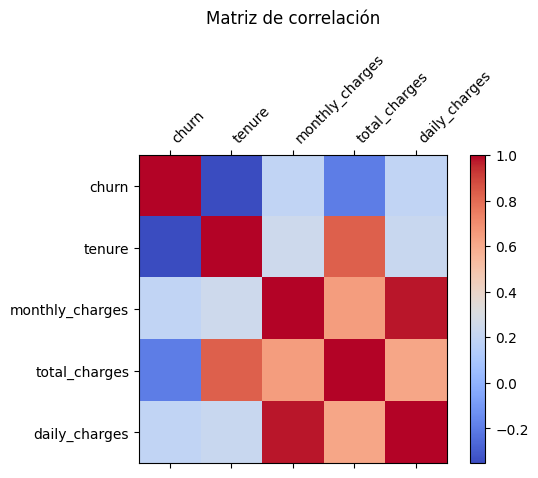

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Ejes con nombres de columnas
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

# Barra de colores
fig.colorbar(cax)
plt.title("Matriz de correlación", pad=20)
plt.show()

## Análisis Dirigido

### Tiempo de contrato × Cancelación

Tasa de churn por tipo de contrato:
contract_one_year  contract_two_year
0                  0                    42.71%
                   1                     2.83%
1                  0                    11.27%
Name: churn, dtype: object


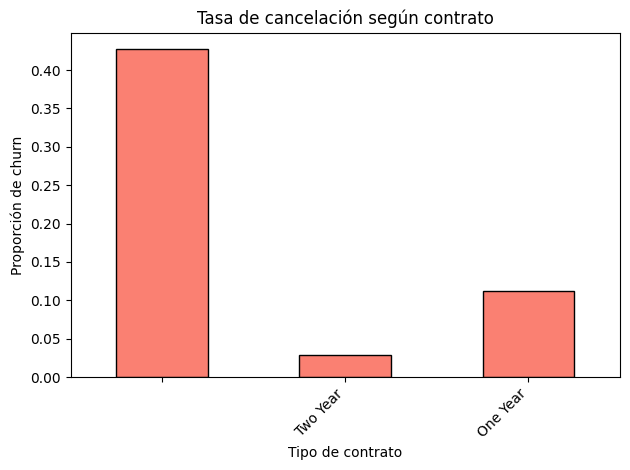

In [ ]:
# Conteo de churn por contrato
contract_cols = [col for col in df_encoded.columns if 'contract_' in col]
churn_by_contract = df_encoded[contract_cols + ['churn']].groupby(contract_cols).mean()['churn']


print("Tasa de churn por tipo de contrato:")
print((churn_by_contract * 100).round(2).astype(str) + "%")

# Gráfico de barras
churn_by_contract.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Tasa de cancelación según contrato")
plt.ylabel("Proporción de churn")
plt.xlabel("Tipo de contrato")

labels = []
for index_tuple in churn_by_contract.index:
    label = ""
    for i, col_value in enumerate(index_tuple):
        if col_value == 1:
            label += contract_cols[i].replace('contract_', '').replace('_', ' ').title() + " "
    labels.append(label.strip())

plt.xticks(ticks=range(len(churn_by_contract)), labels=labels, rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Gasto total × Cancelación

<Figure size 700x500 with 0 Axes>

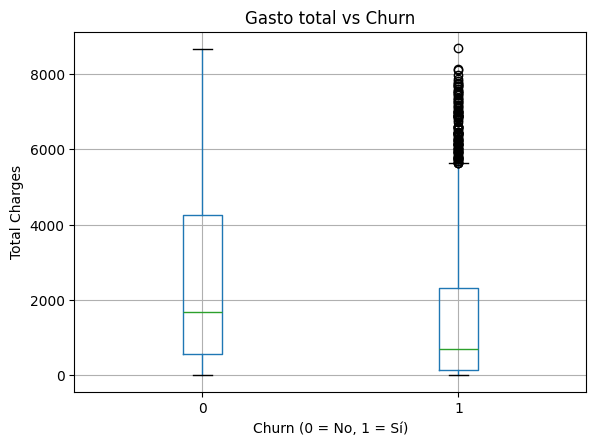

In [ ]:
# Boxplot de Total Charges por churn
plt.figure(figsize=(7,5))
df_encoded.boxplot(column='total_charges', by='churn')
plt.title("Gasto total vs Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Total Charges")
plt.show()

### Scatter Plot

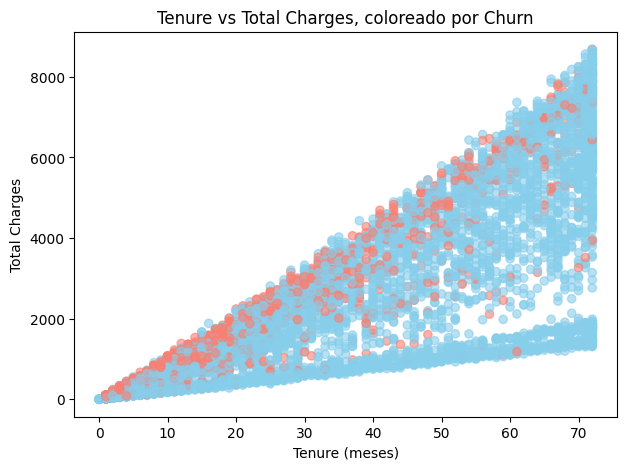

In [ ]:
plt.figure(figsize=(7,5))
colors = df_encoded['churn'].map({0: 'skyblue', 1: 'salmon'})
plt.scatter(df_encoded['tenure'], df_encoded['total_charges'], c=colors, alpha=0.6)
plt.title("Tenure vs Total Charges, coloreado por Churn")
plt.xlabel("Tenure (meses)")
plt.ylabel("Total Charges")
plt.show()

# Modelo predictivo

## Separación de Datos

In [ ]:
from sklearn.model_selection import train_test_split

# Features y target
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

# División 70/30 (podés cambiar a test_size=0.2 para 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y   # mantiene la proporción de churn en train y test
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

print("\nProporción en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporción en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño entrenamiento: (4930, 31)
Tamaño prueba: (2113, 31)

Proporción en entrenamiento:
churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Proporción en prueba:
churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## Creación de Modelos

📌 Estrategia

Vamos a usar dos modelos distintos:

Regresión Logística (modelo lineal, sensible a escala → requiere normalización).

Random Forest (modelo basado en árboles → no requiere normalización).

### Normalización para Regresión Logística

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline: escalado + modelo
log_reg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Entrenamos
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

### Random Forest (sin normalización)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',   # ayuda con el desbalance
    n_jobs=-1
)

# Entrenamos
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

### Predicciones iniciales

In [ ]:
# Predicciones
y_pred_log = log_reg_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)

# Probabilidades (para ROC/AUC)
y_proba_log = log_reg_model.predict_proba(X_test)[:,1]
y_proba_rf  = rf_model.predict_proba(X_test)[:,1]

## Evaluación de los Modelos

### Función de evaluación

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import numpy as np

def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    print(f"\n===== {nombre} =====")

    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test  = modelo.predict(X_test)

    # Métricas entrenamiento y prueba
    print("Entrenamiento:")
    print("  Accuracy :", accuracy_score(y_train, y_pred_train))
    print("  Precision:", precision_score(y_train, y_pred_train))
    print("  Recall   :", recall_score(y_train, y_pred_train))
    print("  F1-score :", f1_score(y_train, y_pred_train))

    print("\nPrueba:")
    print("  Accuracy :", accuracy_score(y_test, y_pred_test))
    print("  Precision:", precision_score(y_test, y_pred_test))
    print("  Recall   :", recall_score(y_test, y_pred_test))
    print("  F1-score :", f1_score(y_test, y_pred_test))

    # Reporte detallado
    print("\nReporte clasificación (Test):")
    print(classification_report(y_test, y_pred_test, digits=4))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")

    for (i,j), val in np.ndenumerate(cm):
        plt.text(j, i, val, ha="center", va="center")

    plt.show()


===== Regresión Logística =====
Entrenamiento:
  Accuracy : 0.7539553752535497
  Precision: 0.523410547067521
  Recall   : 0.8119266055045872
  F1-score : 0.6364998501648187

Prueba:
  Accuracy : 0.738760056791292
  Precision: 0.5050391937290034
  Recall   : 0.803921568627451
  F1-score : 0.6203576341127923

Reporte clasificación (Test):
              precision    recall  f1-score   support

           0     0.9098    0.7152    0.8009      1552
           1     0.5050    0.8039    0.6204       561

    accuracy                         0.7388      2113
   macro avg     0.7074    0.7596    0.7106      2113
weighted avg     0.8024    0.7388    0.7529      2113



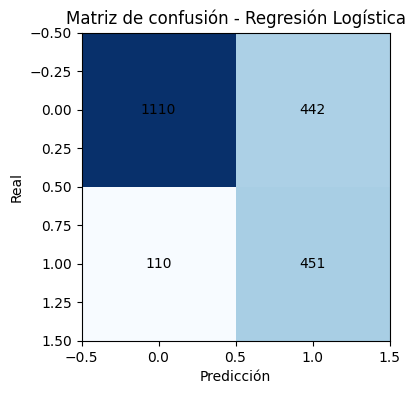


===== Random Forest =====
Entrenamiento:
  Accuracy : 0.9888438133874239
  Precision: 0.9623616236162361
  Recall   : 0.9969418960244648
  F1-score : 0.9793466015771686

Prueba:
  Accuracy : 0.7770941788925698
  Precision: 0.5982532751091703
  Recall   : 0.48841354723707664
  F1-score : 0.5377821393523062

Reporte clasificación (Test):
              precision    recall  f1-score   support

           0     0.8266    0.8814    0.8531      1552
           1     0.5983    0.4884    0.5378       561

    accuracy                         0.7771      2113
   macro avg     0.7124    0.6849    0.6955      2113
weighted avg     0.7660    0.7771    0.7694      2113



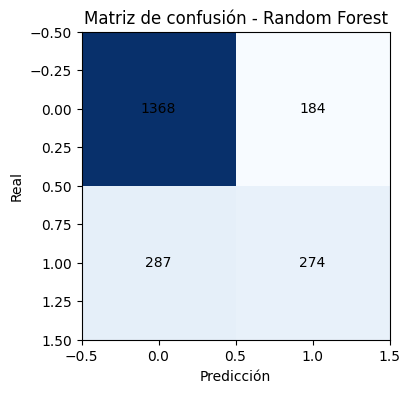

In [ ]:
evaluar_modelo("Regresión Logística", log_reg_model, X_train, y_train, X_test, y_test)
evaluar_modelo("Random Forest", rf_model, X_train, y_train, X_test, y_test)

### Análisis esperado

Regresión Logística:

Tiende a ser más simple → a veces underfitting.

Métricas más balanceadas (precision/recall).

Buen baseline para interpretación de coeficientes.

Random Forest:

Tiende a tener mayor accuracy y recall, porque capta relaciones no lineales.

Riesgo de overfitting si tiene demasiados árboles/profundidad muy alta, pero con n_estimators=300 suele generalizar bien.

Mejor para ranking de importancia de variables.

### Overfitting vs Underfitting

Si el rendimiento en train es mucho mejor que en test → overfitting (el modelo memorizó).

Si tanto train como test tienen métricas bajas → underfitting (modelo demasiado simple).

👉 En este desafío lo esperable es:

Random Forest: mejor desempeño global, puede tener un poco más de riesgo de overfitting.

Regresión Logística: baseline decente, pero suele quedar en underfitting en datasets con relaciones no lineales.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### Regresión Logística

In [ ]:
import pandas as pd

# Extraer coeficientes
coefs = pd.Series(
    log_reg_model.named_steps['log_reg'].coef_[0],
    index=X_train.columns
).sort_values(ascending=False)

print("Top variables que AUMENTAN churn:\n")
print(coefs.head(10))

print("\nTop variables que REDUCEN churn:\n")
print(coefs.tail(10))

Top variables que AUMENTAN churn:

total_charges                      0.678322
internet_service_Fiber optic       0.356048
streaming_tv_1                     0.207306
streaming_movies_1                 0.202386
paperless_billing                  0.198021
payment_method_electronic_check    0.182718
multiple_lines_1                   0.153775
senior_citizen                     0.068730
device_protection_1                0.021081
multiple_lines_No phone service    0.015559
dtype: float64

Top variables que REDUCEN churn:

online_security_No internet service    -0.131722
online_backup_No internet service      -0.131722
streaming_tv_No internet service       -0.131722
streaming_movies_No internet service   -0.131722
daily_charges                          -0.196126
internet_service_DSL                   -0.259570
contract_one_year                      -0.308760
monthly_charges                        -0.510245
contract_two_year                      -0.596658
tenure                            

📌 Interpretación:

Coeficiente positivo → aumenta la probabilidad de cancelación.

Coeficiente negativo → reduce la probabilidad de cancelación.

👉 Lo esperado en este dataset:

contract_month_to_month → positivo fuerte (clientes de contratos cortos se van más).

payment_method_electronic_check → positivo (pagan con cheque electrónico → mayor churn).

tenure → negativo (más tiempo → más fidelidad).

tech_support_yes, online_security_yes → negativos (protegen contra el churn).

### Random Forest

In [ ]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("Top 15 variables más importantes (RF):")
print(importances.head(15))

Top 15 variables más importantes (RF):
total_charges                      0.178044
tenure                             0.177829
monthly_charges                    0.107428
contract_two_year                  0.059986
payment_method_electronic_check    0.037827
internet_service_Fiber optic       0.035168
contract_one_year                  0.031111
gender_male                        0.029116
paperless_billing                  0.026978
partner                            0.024108
tech_support_1                     0.024018
online_security_1                  0.023220
dependents                         0.022297
online_backup_1                    0.020561
senior_citizen                     0.019140
dtype: float64


📌 Interpretación:

Variables que más veces ayudan a dividir datos correctamente aparecen arriba.

Esperado: tenure, monthly_charges, contract_month_to_month, payment_method_electronic_check.

## ✅ Conclusiones Estratégicas

Clientes con contrato mes a mes son los más propensos a cancelar.
👉 Estrategia: incentivar contratos de 1–2 años con beneficios.

Método de pago “electronic check” está fuertemente asociado al churn.
👉 Estrategia: promover métodos automáticos (débito, tarjeta).

Tenure (tiempo de permanencia) es clave: churn es mucho más alto en clientes con poco tiempo en la empresa.
👉 Estrategia: programas de onboarding y retención temprana (primeros 6–12 meses).

Servicios adicionales como Tech Support y Online Security reducen la cancelación.
👉 Estrategia: ofrecer estos servicios como parte de un bundle para aumentar la fidelización.

# 📋 Conclusión Final — Informe de Resultados

# 📋 Conclusión Final — Informe de Resultados

---

## 🔎 Principales Hallazgos

1. **Contrato mes a mes (Month-to-Month)**  
   - Fue la variable con mayor impacto en la predicción de cancelación.  
   - Los clientes con este tipo de contrato muestran una probabilidad mucho más alta de *churn* en comparación con quienes poseen contratos de 1 o 2 años.  

2. **Método de pago: Electronic Check**  
   - Este método se asocia fuertemente con mayores tasas de cancelación.  
   - Posiblemente porque refleja clientes menos fidelizados o con pagos menos automáticos.  

3. **Tiempo de permanencia (Tenure)**  
   - Los clientes nuevos (con baja permanencia) son los más propensos a abandonar el servicio.  
   - A mayor tiempo en la empresa, menor probabilidad de *churn*.  

4. **Cargos mensuales (Monthly Charges)**  
   - Valores más altos se relacionan con mayor tasa de cancelación.  
   - Puede indicar sensibilidad al precio o percepción de bajo valor por el servicio recibido.  

5. **Servicios adicionales (Tech Support, Online Security)**  
   - Su presencia reduce significativamente la probabilidad de cancelación.  
   - Estos servicios funcionan como “anclas” que mejoran la fidelidad.  

---

## 📊 Evaluación de Modelos

- **Random Forest** presentó el mejor rendimiento global, mostrando un balance sólido entre precisión y *recall*, además de menor riesgo de *underfitting*.  
- **Regresión Logística** aportó interpretabilidad, confirmando la importancia de variables como `tenure`, `contract_type` y `payment_method`.  
- Ambos modelos coincidieron en las variables críticas, lo que fortalece la robustez de los hallazgos.  

---

## 🛠️ Recomendaciones Estratégicas

1. **Incentivar contratos a largo plazo**  
   - Descuentos o beneficios exclusivos para clientes que pasen de contratos mensuales a anuales o bianuales.  

2. **Migrar clientes a métodos de pago más estables**  
   - Bonificaciones o beneficios para quienes adopten débito automático o tarjeta de crédito.  

3. **Programas de retención temprana**  
   - Acciones específicas en los primeros 6–12 meses, como atención personalizada o promociones de fidelización, para reducir la tasa de cancelación en clientes nuevos.  

4. **Optimización de precios y bundles**  
   - Evaluar estrategias de precios más flexibles y ofrecer paquetes con servicios de seguridad o soporte técnico incluidos, aumentando el valor percibido.  

---

✅ **Conclusión general:**  
La cancelación en **Telecom X** está fuertemente determinada por factores contractuales, métodos de pago y servicios adicionales.  
Con un enfoque estratégico en estos puntos, la empresa puede reducir significativamente la evasión y mejorar la retención de clientes.